In [1]:
from IPython.display import display, Latex, Markdown
import numpy as np
from numpy import linalg as LA
import sympy as sp
import lcapy as lcp
from lcapy import t, s
import control as ctrl
from control import matlab
import math
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
                     'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'});

### Determine se o sistema...

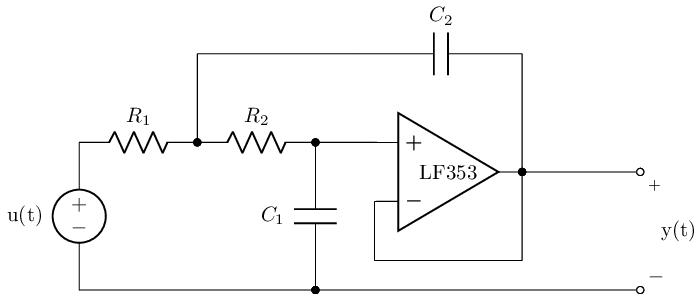

<h3>                      <ul>                           <li> R1 = 4000*NT $\Omega$;</li>                           <li> R2 = 18000 $\Omega$;</li>                           <li> C1 = 100e-9 F;</li>                           <li> C2 = 680e-9 F;</li>                      </ul>                      - NT = número total de letras do seu nome                  </h3>

### ...é controlável e/ou observável:

In [2]:
circuito = lcp.Circuit("""
R1 1 2 R1; right, scale=0.8, l^=R_1
R2 2 3 R2; right, scale=0.8, l^=R_2
C1 3 0_3 C1; down, scale=0.8, l_=C_1
W 3 3_4; right, size=0.5
E1 6 0_3 opamp 3_4 5_6 Av; scale=0.5, size=0.5, l=LF353
W 5_6 5_8; down, size=0.5
C2 3_1 6_1 C2; right, scale=0.8, l^=C_2
W 6_1 6; down
W 6 6_8; down, size=0.7
W 6_8 5_8; left
W 2 2_1; up=0.75
W 2_1 3_1; right
W 6 7; right
W 0 0_3; right
W 0_3 0_7; right
V 1 0 {u(t)}; down, l_={\mathrm{u(t)}}
P2 7 0_7; down, v^=y(t)
; draw_nodes=connections, label_ids=none, label_nodes=none""");

sistema = circuito.ss;

display(Markdown('### Determine se o sistema...'));
circuito.draw();
display(Markdown('<h3> \
                     <ul> \
                          <li> R1 = 4000*NT $\Omega$;</li> \
                          <li> R2 = 18000 $\Omega$;</li> \
                          <li> C1 = 100e-9 F;</li> \
                          <li> C2 = 680e-9 F;</li> \
                     </ul> \
                     - NT = número total de letras do seu nome \
                 </h3>'));
display(Markdown('### ...é controlável e/ou observável:'));

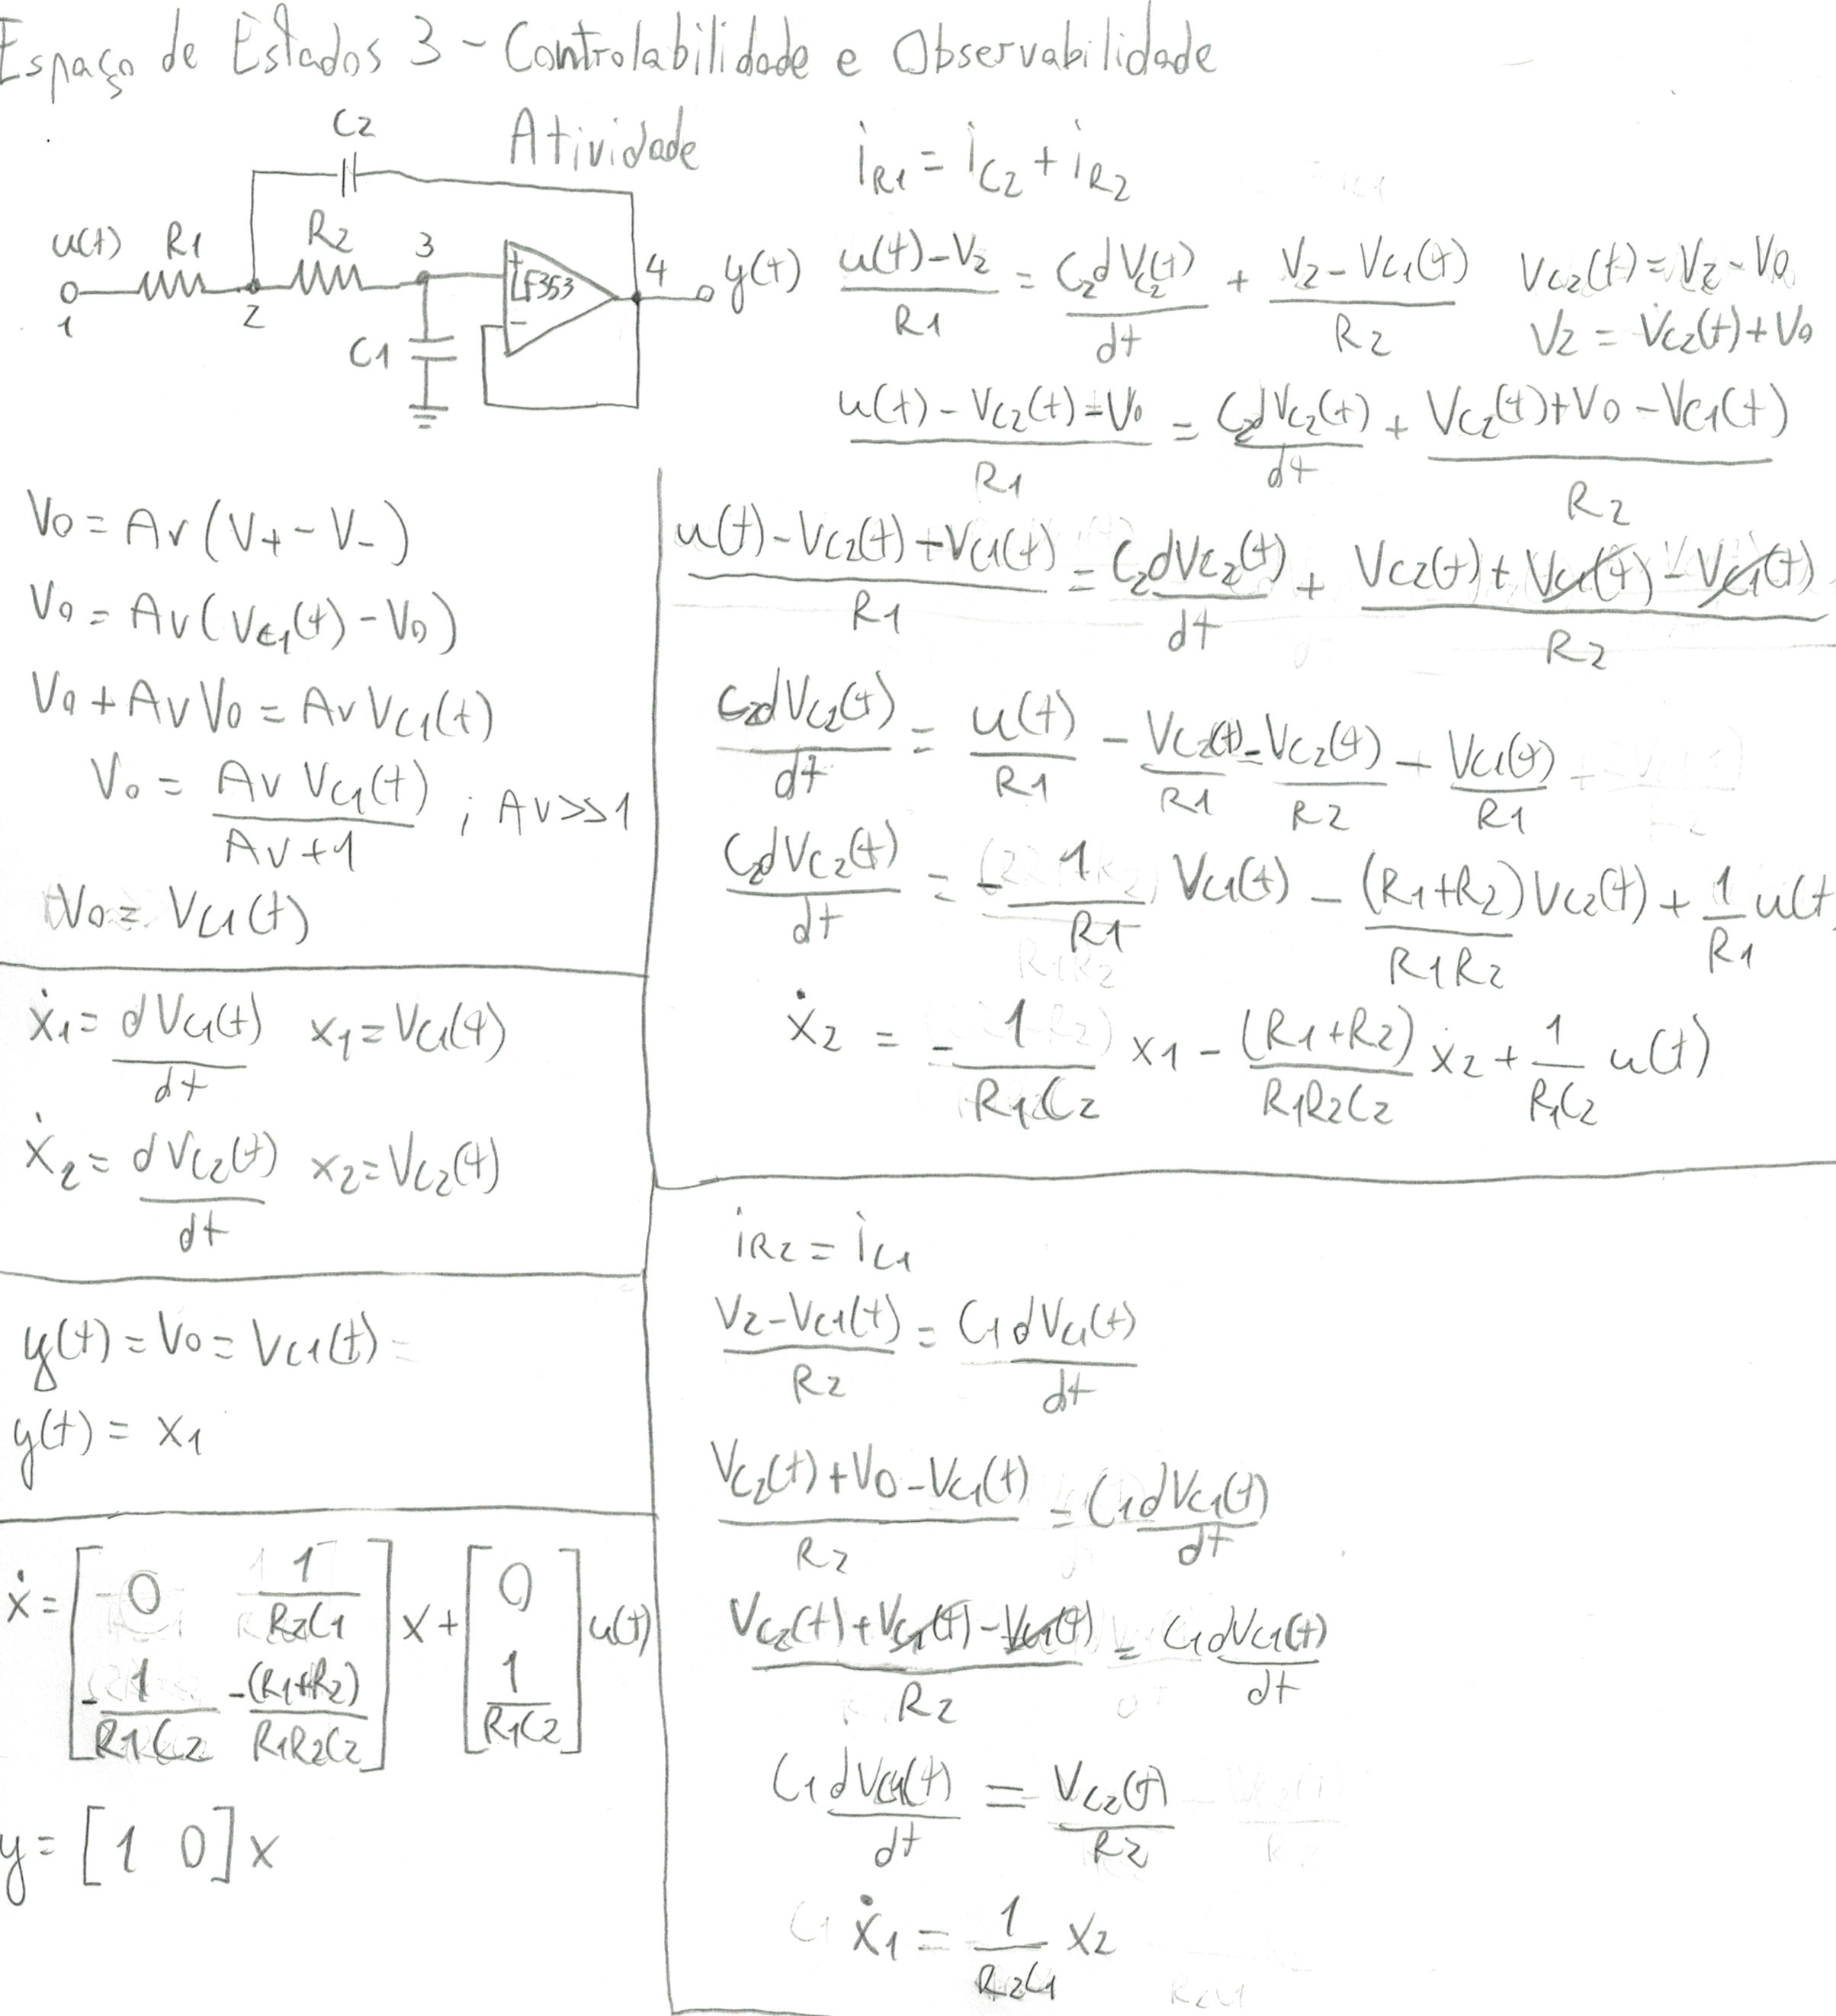

In [3]:
# Espaço de estados do sistema:

R1 = lcp.symbol('R1', positive=True);
R2 = lcp.symbol('R2', positive=True);
C1 = lcp.symbol('C1', positive=True);
C2 = lcp.symbol('C2', positive=True);
Av = lcp.symbol('Av', positive=True);

A = (sistema.A.simplify()).limit(Av, 'oo');
B = (sistema.B.simplify()).limit(Av, 'oo');
C = (sistema.C.row(-1).simplify()).limit(Av, 'oo');
D = (sistema.D.row(-1).simplify()).limit(Av, 'oo');

display(Markdown('### Matriz de estados:'));
display(Latex('$ \mathbf{A} = '+str(A.latex())+'$'));
display(Markdown('### Matriz de entrada:'));
display(Latex('$ \mathbf{B} = '+str(B.latex())+'$'));
display(Markdown('### Matriz de saída:'));
display(Latex('$ \mathbf{C} = '+str(C.latex())+'$'));
display(Markdown('### Matriz de transmissão direta:'));
display(Latex('$ \mathbf{D} = '+str(D.latex())+'$'));

### Matriz de estados:

<IPython.core.display.Latex object>

### Matriz de entrada:

<IPython.core.display.Latex object>

### Matriz de saída:

<IPython.core.display.Latex object>

### Matriz de transmissão direta:

<IPython.core.display.Latex object>

In [4]:
# Substituição de valores no espaço de estados do sistema:

NT = len('GustavoViannaFrança');
defs = {R1 : 4000*NT, R2 : 18000, C1 : 100e-9, C2 : 680e-9};

A = A.subs(defs);
B = B.subs(defs);
C = C.subs(defs);
D = D.subs(defs);

display(Markdown('### Matriz de estados:'));
display(Latex('$ \mathbf{A} = '+str(A.latex())+'$'));
display(Markdown('### Matriz de entrada:'));
display(Latex('$ \mathbf{B} = '+str(B.latex())+'$'));
display(Markdown('### Matriz de saída:'));
display(Latex('$ \mathbf{C} = '+str(C.latex())+'$'));
display(Markdown('### Matriz de transmissão direta:'));
display(Latex('$ \mathbf{D} = '+str(D.latex())+'$'));

### Matriz de estados:

<IPython.core.display.Latex object>

### Matriz de entrada:

<IPython.core.display.Latex object>

### Matriz de saída:

<IPython.core.display.Latex object>

### Matriz de transmissão direta:

<IPython.core.display.Latex object>

In [5]:
# Avaliação da controlabilidade e observabilidade do espaço de estados do sistema:

A = np.matrix(A.tolist(), dtype=np.float64);
B = np.matrix(B.tolist(), dtype=np.float64);
C = np.matrix(C.tolist(), dtype=np.float64);
D = np.matrix(D.tolist(), dtype=np.float64);

Mc = ctrl.ctrb(A,B);
Mco = np.block([C*B, C*A*B]);
Mo = ctrl.obsv(A,C)

display(Markdown('### Matrix de controlabilidade:'));
display(Latex('$ \mathbf{M_{c}} = '+str(sp.latex(sp.Matrix(Mc))).replace('.',',')+' $'));
display(Markdown('### Posto da matriz de controlabilidade:'));
display(Latex('$ \mathrm{posto} \, (\mathbf{M_{c}}) = '+str(np.linalg.matrix_rank(Mc))+' $'));

display(Markdown('### Matrix de controlabilidade da saída:'));
display(Latex('$ \mathbf{M_{co}} = '+str(sp.latex(sp.Matrix(Mco))).replace('.',',')+' $'));
display(Markdown('### Posto da matriz de controlabilidade da saída:'));
display(Latex('$ \mathrm{posto} \, (\mathbf{M_{co}}) = '+str(np.linalg.matrix_rank(Mco))+' $'));

display(Markdown('### Matrix de observabilidade:'));
display(Latex('$ \mathbf{M_{o}} = '+str(sp.latex(sp.Matrix(Mo))).replace('.',',')+' $'));
display(Markdown('### Posto da matriz de observabilidade:'));
display(Latex('$ \mathrm{posto} \, (\mathbf{M_{o}}) = '+str(np.linalg.matrix_rank(Mo))+' $'));

### Matrix de controlabilidade:

<IPython.core.display.Latex object>

### Posto da matriz de controlabilidade:

<IPython.core.display.Latex object>

### Matrix de controlabilidade da saída:

<IPython.core.display.Latex object>

### Posto da matriz de controlabilidade da saída:

<IPython.core.display.Latex object>

### Matrix de observabilidade:

<IPython.core.display.Latex object>

### Posto da matriz de observabilidade:

<IPython.core.display.Latex object>

### Como o posto da matriz de controlabilidade é igual ao número de linhas das matrizes **A** e **B**, o sistema é de estados completamente controláveis.
### Como o posto da matriz de controlabilidade de saída é igual ao número de linhas das matrizes **C** e **D**, o sistema é de saídas completamente controláveis.
### Como o posto da matriz de observabilidade é igual ao número de linhas da matriz **A** e número de colunas da matriz **C**, o sistema é completamente observável.